# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Remove/replace missing values


In [3]:
data.isnull().sum()
#  no missing values

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

<AxesSubplot:>

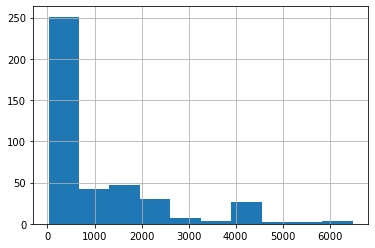

In [4]:
data.describe()
data.transit_distance.hist()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline


<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


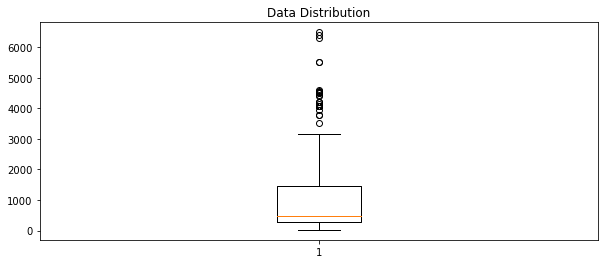

In [6]:
col = data.transit_distance;
def get_box_plot(col, x_label=""):
        # Get the variable to examine

    # Create a Figure
    fig = plt.figure(figsize=(10,4))

    # Plot a histogram
    plt.boxplot(col)

    plt.xlabel(x_label)

    # Add titles and labels
    plt.title('Data Distribution')

    # Show the figure
    fig.show() 

get_box_plot(col);

<ipython-input-7-54c293218af0>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02



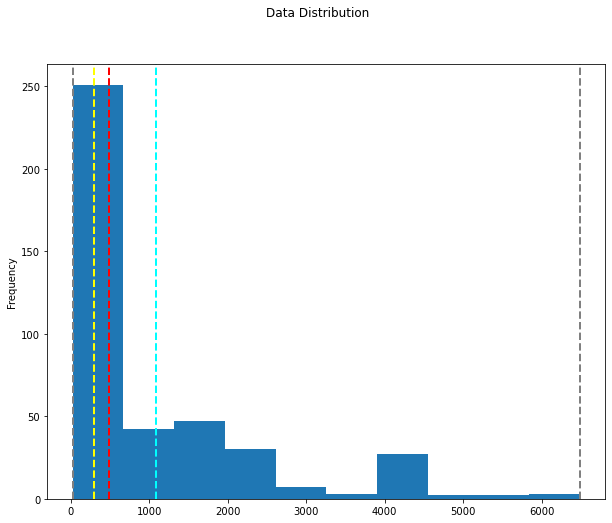

In [7]:
# Create a function that we can re-use
def show_distribution(col, x_label=""):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig = plt.figure(figsize = (10,8))


    # Plot the histogram   
    plt.hist(col)
    plt.ylabel('Frequency')
    plt.xlabel(x_label);
    # Add lines for the mean, median, and mode
    plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # # Plot the boxplot   
    # ax[1].boxplot(col, vert=False)
    # ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

show_distribution(col)

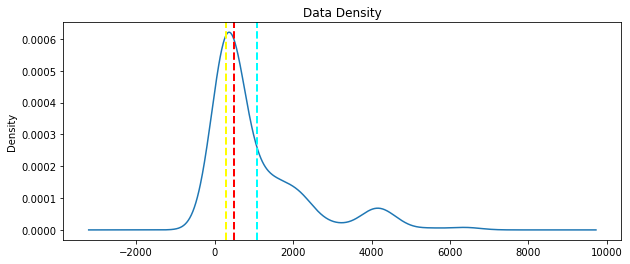

In [8]:
def show_density(col, x_label=""):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density')
    plt.xlabel(x_label)
    # Show the mean, median, and mode
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = data.transit_distance
show_density(col)

## 

## Show graphs for features

<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


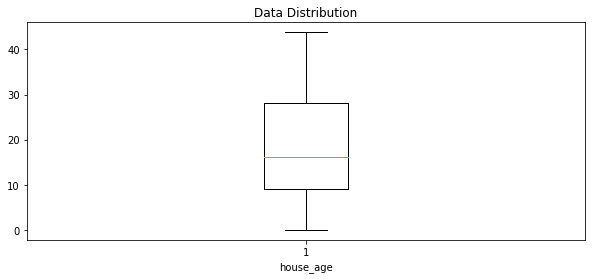

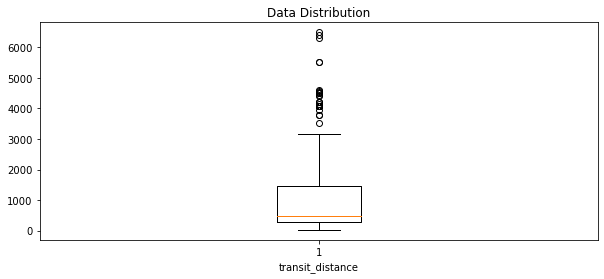

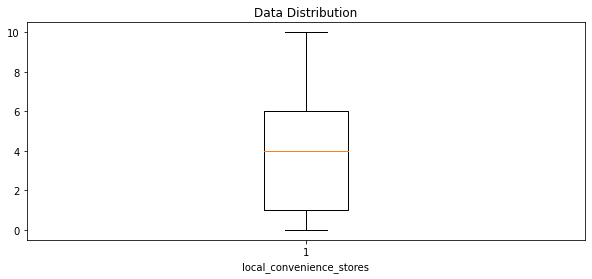

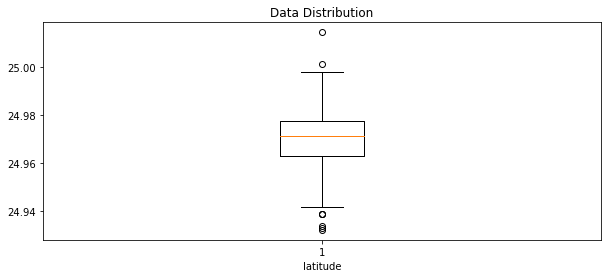

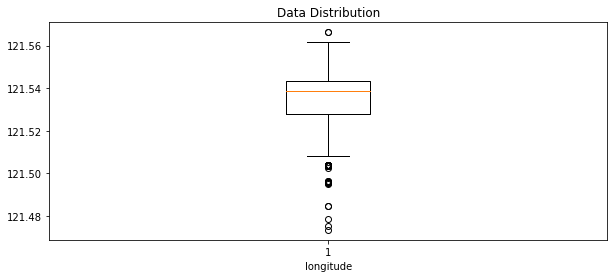

In [9]:
numeric_features = ["house_age", "transit_distance", "local_convenience_stores", "latitude",	"longitude"	]

for feat in numeric_features:
    col = data[feat]
    get_box_plot(col, feat);


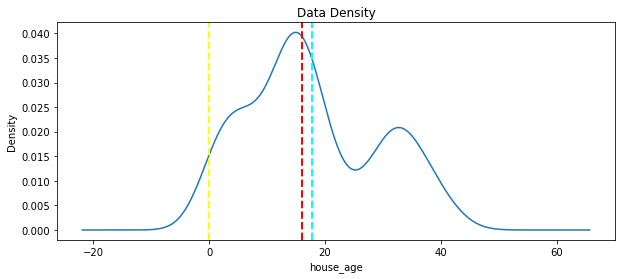

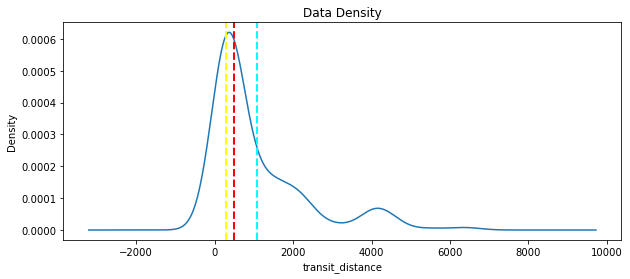

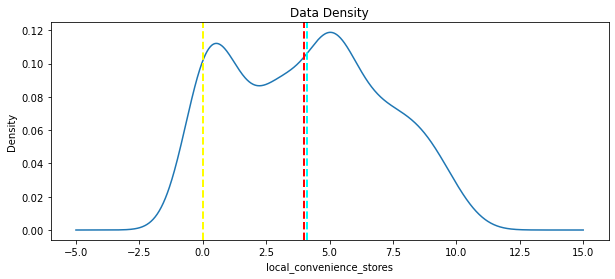

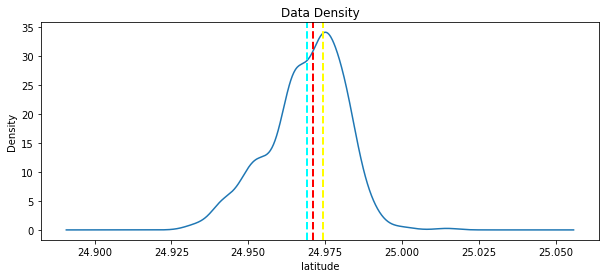

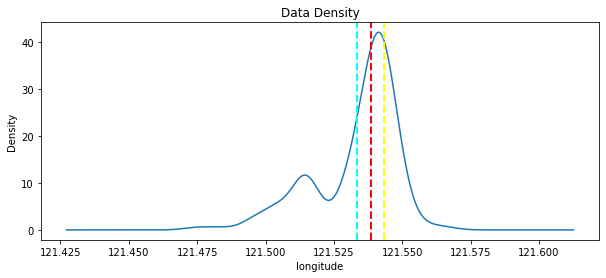

In [10]:
for feat in numeric_features:
    col = data[feat];
    show_density(col, feat);

Minimum:0.00
Mean:17.71
Median:16.10
Mode:0.00
Maximum:43.80

Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02

Minimum:0.00
Mean:4.09
Median:4.00
Mode:0.00
Maximum:10.00

Minimum:24.93
Mean:24.97
Median:24.97
Mode:24.97
Maximum:25.01

Minimum:121.47
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.57

<ipython-input-7-54c293218af0>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


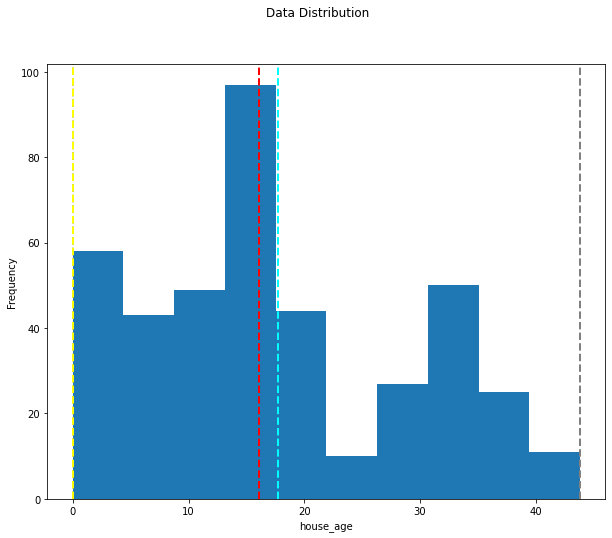

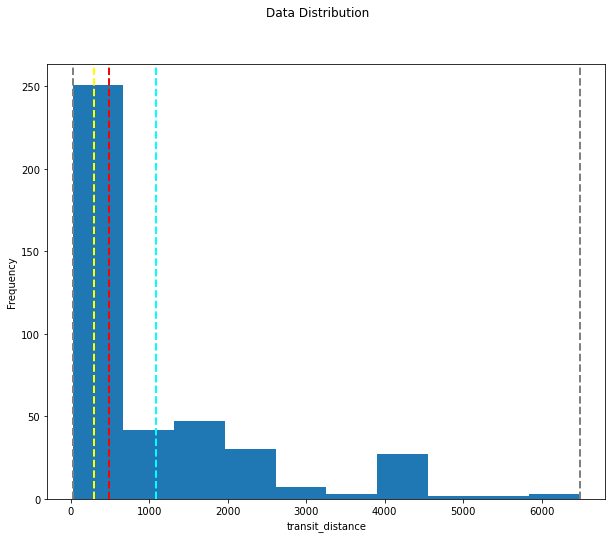

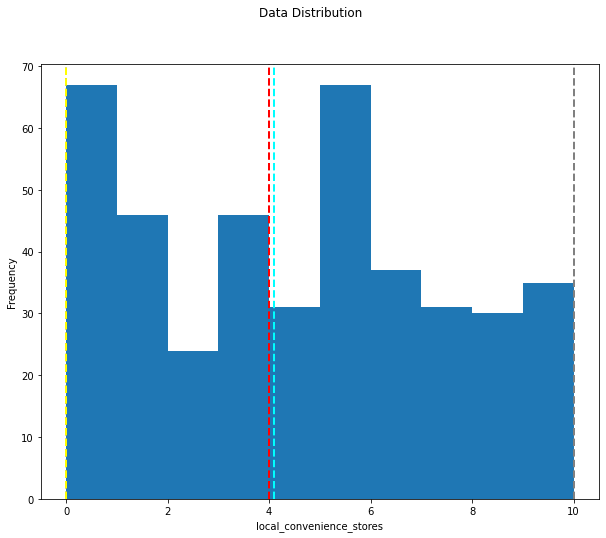

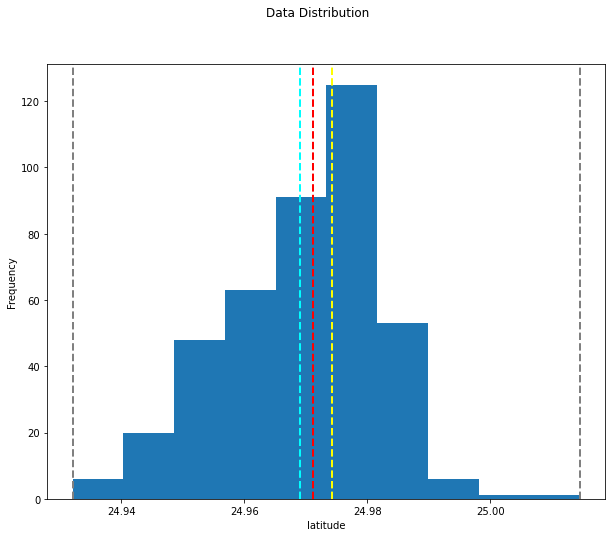

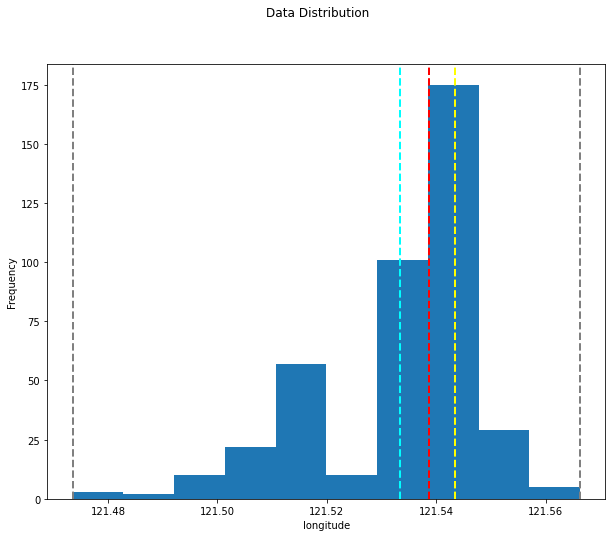

In [11]:
for feat in  numeric_features:
    col = data[feat];
    show_distribution(col, feat);

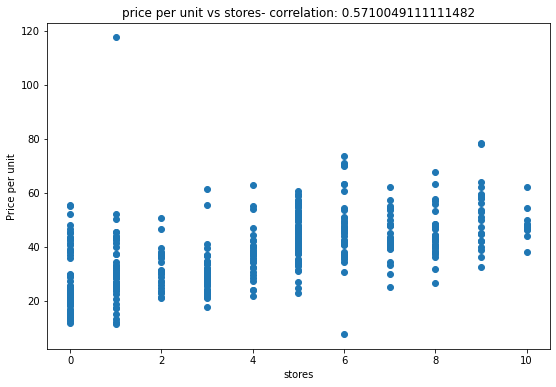

In [12]:
def show_scatter_graph(feature, xlabel=""):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    label = data.price_per_unit
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.ylabel('Price per unit')
    plt.xlabel(xlabel)
    ax.set_title('price per unit vs ' + xlabel + '- correlation: ' + str(correlation))

show_scatter_graph(data.local_convenience_stores, "stores")

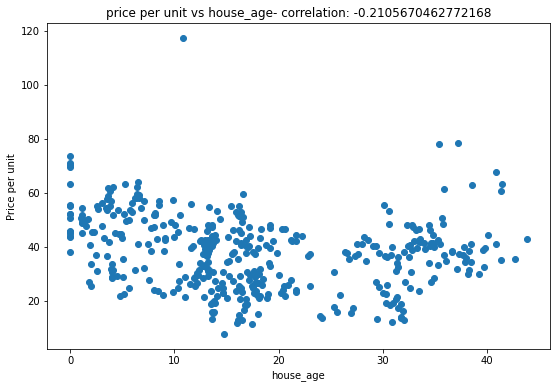

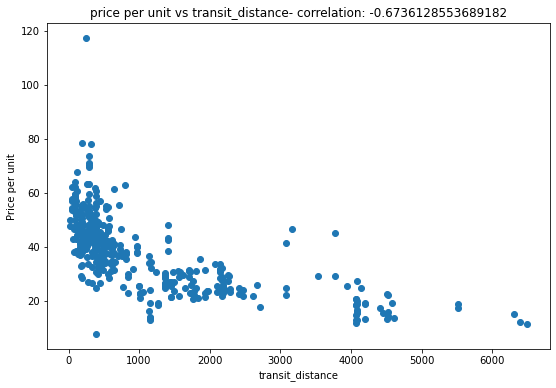

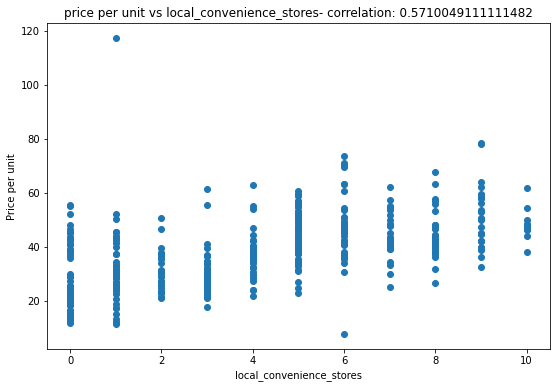

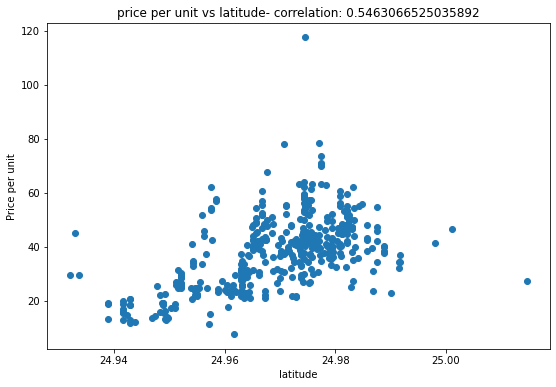

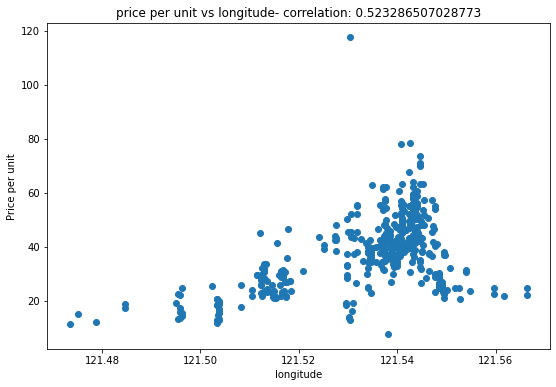

In [13]:
for feat in numeric_features:
    col = data[feat];
    show_scatter_graph(col , feat);


## Remove outliars

25.42 47.728
Minimum:25.50
Mean:37.34
Median:38.15
Mode:29.30
Maximum:47.70

<ipython-input-6-92e492460bf1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-54c293218af0>:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


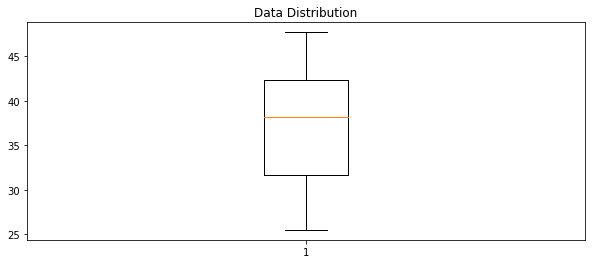

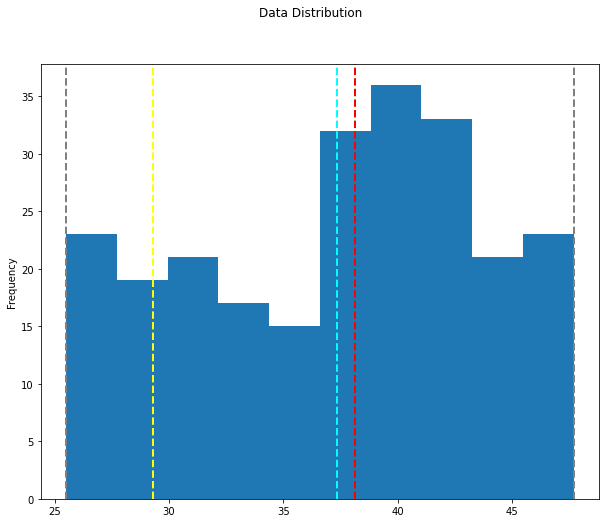

In [76]:
# remove from price per unit distance


# lower_cut = data.price_per_unit.quantile(0.2)
# upper_cut = data.price_per_unit.quantile(0.78)
# # print(lower_cut)

# clean = data[data.price_per_unit > lower_cut];
# clean = clean[data.price_per_unit < upper_cut]
data = clean;
## no outliers


get_box_plot(data.price_per_unit)
print(lower_cut , upper_cut)
show_distribution(data.price_per_unit)

In [61]:
#  split data
success_features = [ "transit_distance", "longitude", "latitude"]
X,y= data[success_features].values , data.price_per_unit.values

from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 168 rows
Test Set: 72 rows


In [62]:
# train

# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [63]:
import numpy as np

predictions = model.predict(X_test);
print( np.round(predictions)[:10])

[41. 38. 33. 35. 36. 39. 37. 42. 40. 38.]


In [64]:
def get_model_pref():
    from sklearn.metrics import mean_squared_error, r2_score

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    r2 = r2_score(y_test, predictions)

    print("R2:", r2)
get_model_pref()

MSE: 25.638855488401735
RMSE: 5.063482545482085
R2: 0.37228746594702955


In [65]:
from sklearn.linear_model import Lasso


model = Lasso().fit(X_train, y_train);
predictions = model.predict(X_test)

get_model_pref()

MSE: 27.44319257057717
RMSE: 5.2386250648979615
R2: 0.3281121320421896


In [66]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train);
predictions = model.predict(X_test)

get_model_pref();

MSE: 28.169895370370373
RMSE: 5.307531947183207
R2: 0.31032036843683164


In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train);
predictions = model.predict(X_test)

get_model_pref();

MSE: 16.37300168472702
RMSE: 4.0463565938665145
R2: 0.5991420762825077


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

model = RandomForestRegressor().fit(X_train, y_train);
predictions = model.predict(X_test)

get_model_pref();

MSE: 16.660061499794274
RMSE: 4.081673860047404
R2: 0.5921140307434953


In [69]:
from sklearn.linear_model import ElasticNet;

model = ElasticNet().fit(X_train, y_train);
predictions = model.predict(X_test);

get_model_pref()

MSE: 27.441386880237726
RMSE: 5.238452718144712
R2: 0.32815634050770404


In [70]:
from sklearn import linear_model;

model = linear_model.Ridge().fit(X_train, y_train);
predictions = model.predict(X_test);

get_model_pref()

MSE: 27.357626745602584
RMSE: 5.23045186820437
R2: 0.3302070282378263


In [71]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train);
predictions = model.predict(X_test);

get_model_pref()



MSE: 15.812030192798842
RMSE: 3.9764343566565814
R2: 0.6128762633209659


## Hyperparametering


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# show model performance
get_model_pref();


# # Plot predicted vs actual
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual Labels')
# plt.ylabel('Predicted Labels')
# plt.title('Daily Bike Share Predictions')
# # overlay the regression line
# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 15.812030192798842
RMSE: 3.9764343566565814
R2: 0.6128762633209659


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

model = RandomForestRegressor().fit(X_train, y_train);
# X_train
X_test = [ [289.3248, 	24.98203 , 	121.54348] ]
prediction = model.predict(X_test);
prediction

array([62.80264524])